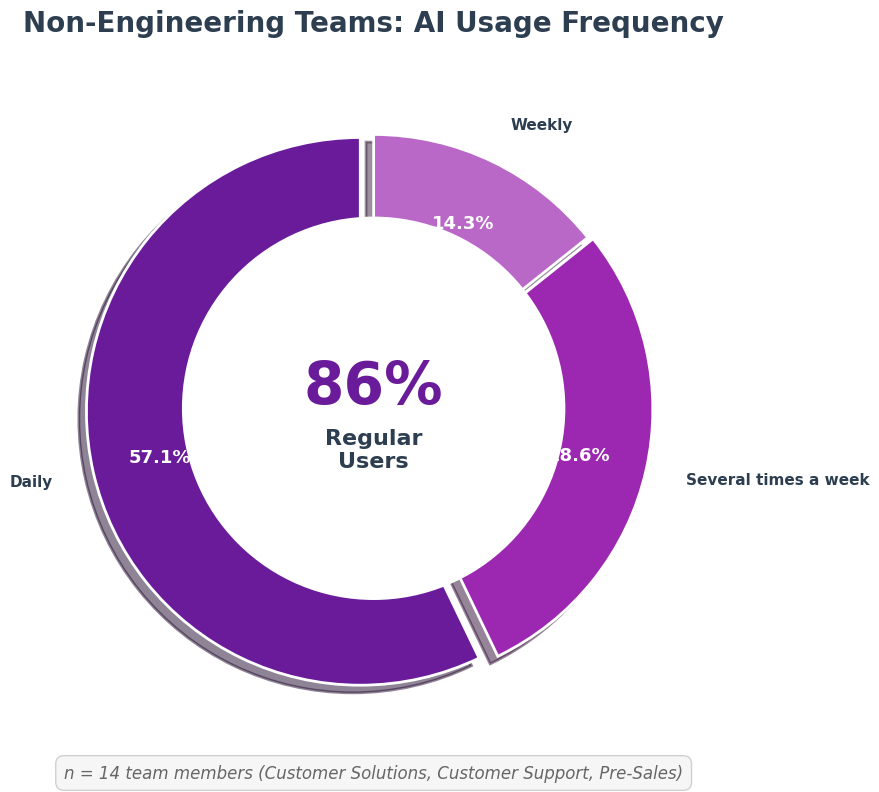


NON-ENGINEERING TEAMS - AI ADOPTION SUMMARY

📊 Sample Size: 14 team members
   Teams: Customer Solutions, Customer Support, Pre-Sales

🎯 Key Metrics:
   • Regular AI users (Daily + Several times/week): 12 (85.7%)
   • Daily users: 8 (57.1%)

📈 Frequency Breakdown:
   • Daily: 8 team members (57.1%)
   • Several times a week: 4 team members (28.6%)
   • Weekly: 2 team members (14.3%)
   • Monthly: 0 team members (0.0%)
   • Rarely or Never: 0 team members (0.0%)

✨ Key Insights:
   • Strong adoption: 86% use AI regularly
   • Non-engineering teams are embracing AI alongside engineers




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../responses.csv')

# Filter to INCLUDE only non-engineering teams
teams_to_include = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[df['Which team are you a part of?'].isin(teams_to_include)].copy()

# Get column names
frequency_col = 'How frequently do you currently use AI tools/models in your development process?'

# Define frequency order
frequency_order = ['Daily', 'Several times a week', 'Weekly', 'Monthly', 'Rarely or Never']

# Calculate key metrics
total_respondents = len(df_filtered)
frequency_counts = df_filtered[frequency_col].value_counts().reindex(frequency_order, fill_value=0)

# Filter out zero values to prevent label overlap
frequency_counts_filtered = frequency_counts[frequency_counts > 0]

daily_users = frequency_counts.get('Daily', 0)
regular_users = frequency_counts.get('Daily', 0) + frequency_counts.get('Several times a week', 0)
regular_percentage = (regular_users / total_respondents) * 100

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Define modern, vibrant color palette (purple to pink gradient)
all_colors = ['#6A1B9A', '#9C27B0', '#BA68C8', '#CE93D8', '#F3E5F5']
# Map colors to frequency order, then filter to match filtered counts
color_map = dict(zip(frequency_order, all_colors))
colors = [color_map[freq] for freq in frequency_counts_filtered.index]

# Create explode array only for non-zero slices
explode_values = []
for freq in frequency_counts_filtered.index:
    if freq == 'Daily':
        explode_values.append(0.05)
    elif freq == 'Several times a week':
        explode_values.append(0.02)
    else:
        explode_values.append(0)

# Create pie chart with labels outside to prevent overlap
wedges, texts, autotexts = ax.pie(
    frequency_counts_filtered.values,
    labels=frequency_counts_filtered.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#2C3E50'},
    pctdistance=0.75,
    labeldistance=1.15,  # Move labels further out to prevent overlap
    explode=explode_values,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Style percentage text for better readability and adjust positioning
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_weight('bold')

# Adjust label positions to prevent overlap
for text in texts:
    text.set_fontsize(11)
    text.set_color('#2C3E50')

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add center text with key stat
ax.text(0, 0.08, f'{regular_percentage:.0f}%', 
         ha='center', va='center',
         fontsize=42, weight='bold', color='#6A1B9A')
ax.text(0, -0.15, 'Regular\nUsers', 
         ha='center', va='center',
         fontsize=16, weight='bold', color='#2C3E50')

# Add title
plt.title('Non-Engineering Teams: AI Usage Frequency', 
          fontsize=20, weight='bold', pad=25, color='#2C3E50')

# Add subtitle with sample size
plt.text(0, -1.35, f'n = {total_respondents} team members (Customer Solutions, Customer Support, Pre-Sales)', 
         ha='center', fontsize=12, style='italic', color='#666666',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', edgecolor='#CCCCCC', linewidth=1, alpha=0.9))

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("NON-ENGINEERING TEAMS - AI ADOPTION SUMMARY")
print("="*80)

print(f"\n📊 Sample Size: {total_respondents} team members")
print(f"   Teams: Customer Solutions, Customer Support, Pre-Sales")

print(f"\n🎯 Key Metrics:")
print(f"   • Regular AI users (Daily + Several times/week): {int(regular_users)} ({regular_percentage:.1f}%)")
print(f"   • Daily users: {int(daily_users)} ({daily_users/total_respondents*100:.1f}%)")

print(f"\n📈 Frequency Breakdown:")
for freq, count in frequency_counts.items():
    pct = (count / total_respondents) * 100
    print(f"   • {freq}: {int(count)} team members ({pct:.1f}%)")

print(f"\n✨ Key Insights:")
if regular_percentage >= 70:
    print(f"   • Strong adoption: {regular_percentage:.0f}% use AI regularly")
    print(f"   • Non-engineering teams are embracing AI alongside engineers")
elif regular_percentage >= 50:
    print(f"   • Good adoption: {regular_percentage:.0f}% use AI regularly")
    print(f"   • Room for growth compared to engineering teams")
else:
    print(f"   • Moderate adoption: {regular_percentage:.0f}% use AI regularly")
    print(f"   • Opportunity to increase AI usage in customer-facing roles")

print("\n" + "="*80 + "\n")